In [1]:
# import xlrd
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from droplet_growth.mic import fit

%load_ext autoreload
%autoreload 2

In [8]:
!pip install xlrd==1.2

  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [17]:
def read_plate_reader_xls(path, sheet_data=['absorbance', 'fluo1', 'fluo2']):
    sheets = [pd.read_excel(path, header=9, nrows=49, sheet_name=i, index_col=None) for i in range(len(sheet_data))]
    fig, ax = plt.subplots(ncols=len(sheets))
    [sns.lineplot(ax=ax, x='avg.time [s]', y=col, data=s) for s, ax in zip(sheets, [axs,])]
    plt.show()
    print(sheets[0].dtypes)
    melted = [pd.melt(sheet, id_vars=sheet.columns[:2], value_vars=sheet.columns[2:], var_name='coord', value_name=name,).convert_dtypes() for sheet, name in zip(sheets, sheet_data)]
    renamed = [mel.rename(columns={'avg. time [s]':f'time'}) for mel, absorbance in zip(melted, sheet_data)]
    data = pd.concat([renamed[0]] + [renamed1[name] for renamed1, name in zip(renamed[1:], sheet_data[1:])], axis=1,)
    return data.loc[['Unnamed' not in a for a in data.coord]]

def decode_labels(label, regex='(\d+) ng.* \((\w)(\d+)\)'):
    filt = re.compile(regex).findall
    try:
        label, row, column = filt(label)[0]
        return {'label': label+'ng', 'row': row, 'column': int(column), 'ng': int(label)}
    except:
        label, row, column = re.compile('(\w+).* \((\w)(\d+)\)').findall(label)[0]
        return {'label': 'Blank', 'row': row, 'column': int(column), 'ng': -1}

In [24]:
# path  = "/home/aaristov/Multicell/Lena/Data/20210122_96wells/Lena_22012021_24h00.xlsx"
path = "/home/aaristov/Anchor/Lena/Data/20211220-MIC/timelapse/Lena16122021.xlsx"
sheet = pd.read_excel(path, header=12, nrows=145, sheet_name='Blank Subtraction 1_04', index_col=None)
# sheet = pd.read_excel(path, header=12, nrows=289, sheet_name='Blank Subtraction 1_04', index_col=None)
sheet
# data = read_plate_reader_xls(path, sheet_data=['RFP_05'])
# data = read_plate_reader_xls(path, sheet_data=['Blank Subtraction 3_02'])
# data.convert_dtypes().dtypes

Reading  avg. time [s]  Blank1 (A01)  Blank1 (A02)  Blank1 (A03)  \
0          1           0.00     -0.012930      0.000283      0.003452   
1          2         599.92     -0.004955     -0.005819     -0.011620   
2          3        1200.21     -0.007998     -0.009762     -0.002045   
3          4        1800.98     -0.009034     -0.005224      0.001666   
4          5        2400.97      0.003380     -0.007902     -0.009707   
..       ...            ...           ...           ...           ...   
140      141       84055.21     -0.011160     -0.001528      0.004066   
141      142       84655.58      0.001799     -0.005731     -0.008903   
142      143       85255.99     -0.001890      0.000888      0.003643   
143      144       85856.41      0.000627      0.005369      0.003996   
144      145       86456.68     -0.002667     -0.005655      0.002062   

     Blank1 (A04)  Blank1 (A05)  Blank1 (A06)  Blank1 (A07)  Blank1 (A08)  \
0       -0.019040      0.001578     -0.007491      0.003095      0.007016   
1       -0.006696     -0.006214      0.003554      0.009552     -0.001904   
2       -0.000417     -0.004583      0.009566      0.007069      0.011880   
3       -0.004072     -0.012330      0.003309      0.008270      0.000089   
4       -0.005327      0.001326      0.015680      0.010910     -0.005922   
..            ...           ...           ...           ...           ...   
140     -0.010440     -0.002405     -0.007220      0.007229      0.001811   
141     -0.002413     -0.005422     -0.004203      0.006562      0.010290   
142     -0.008270      0.000336     -0.004381     -0.002223      0.007915   
143     -0.009528     -0.000027      0.001122      0.006474      0.004072   
144      0.000609     -0.012220     -0.004219     -0.005174      0.006759   

     ...  Blank1 (H04)  Blank1 (H05)  Blank1 (H06)  Blank1 (H07)  \
0    ...      0.010120      0.006636      0.000662      0.005734   
1    ...     -0.005051     -0.003630      0.005948      0.004019   
2    ...     -0.001201     -0.007822     -0.001246      0.009202   
3    ...     -0.003714     -0.006013      0.002035      0.003843   
4    ...      0.000945     -0.001322     -0.001634     -0.002626   
..   ...           ...           ...           ...           ...   
140  ...      0.009029     -0.006012     -0.011810      0.002494   
141  ...      0.010630     -0.008102     -0.007683      0.008412   
142  ...     -0.001680     -0.008524     -0.005861     -0.000706   
143  ...      0.008214     -0.012380      0.001379      0.001557   
144  ...     -0.001115      0.000175      0.003742      0.007185   

     Blank1 (H08)  Blank1 (H09)  Blank1 (H10)  Blank1 (H11)  Blank1 (H12)  \
0        0.004546     -0.006052      0.001191      0.005528     -0.010750   
1       -0.003265     -0.004706      0.003525      0.006203     -0.006654   
2       -0.005234      0.006555     -0.001343      0.007886     -0.011360   
3        0.002542     -0.000978     -0.004124      0.010060     -0.004196   
4        0.004153     -0.002754      0.000403      0.000549     -0.004587   
..            ...           ...           ...           ...           ...   
140     -0.001429      0.001477      0.001990      0.017390     -0.011440   
141     -0.005655      0.004904     -0.002497     -0.006749      0.015110   
142      0.000612     -0.003297      0.008686      0.009087     -0.003168   
143     -0.003310     -0.010890      0.001824      0.001483     -0.003079   
144     -0.007777     -0.010780      0.006621      0.012710     -0.007732   

     Unnamed: 98  
0                 
1                 
2                 
3                 
4                 
..           ...  
140               
141               
142               
143               
144               

[145 rows x 99 columns]

In [25]:
def convert_sheet(sheet):
    melted = pd.melt(sheet, id_vars=sheet.columns[:2], value_vars=sheet.columns[2:98], var_name='coord', value_name='RFP')
    data = pd.concat([melted, pd.DataFrame(list(map(decode_labels, melted.coord)))], axis=1).convert_dtypes()
    data.loc[:, 'h'] = data['avg. time [s]'] / 3600
    print (data.dtypes, data.shape)
    return data

In [26]:
data = convert_sheet(sheet)
data

Reading            Int64
avg. time [s]    float64
coord             string
RFP              float64
label             string
row               string
column             Int64
ng                 Int64
h                float64
dtype: object (13920, 9)


Reading  avg. time [s]         coord       RFP  label row  column  ng  \
0            1           0.00  Blank1 (A01) -0.012930  Blank   A       1  -1   
1            2         599.92  Blank1 (A01) -0.004955  Blank   A       1  -1   
2            3        1200.21  Blank1 (A01) -0.007998  Blank   A       1  -1   
3            4        1800.98  Blank1 (A01) -0.009034  Blank   A       1  -1   
4            5        2400.97  Blank1 (A01)  0.003380  Blank   A       1  -1   
...        ...            ...           ...       ...    ...  ..     ...  ..   
13915      141       84055.21  Blank1 (H12) -0.011440  Blank   H      12  -1   
13916      142       84655.58  Blank1 (H12)  0.015110  Blank   H      12  -1   
13917      143       85255.99  Blank1 (H12) -0.003168  Blank   H      12  -1   
13918      144       85856.41  Blank1 (H12) -0.003079  Blank   H      12  -1   
13919      145       86456.68  Blank1 (H12) -0.007732  Blank   H      12  -1   

               h  
0       0.000000  
1       0.166644  
2       0.333392  
3       0.500272  
4       0.666936  
...          ...  
13915  23.348669  
13916  23.515439  
13917  23.682219  
13918  23.849003  
13919  24.015744  

[13920 rows x 9 columns]

In [27]:
data.ng.unique()

<IntegerArray>
[-1, 0]
Length: 2, dtype: Int64

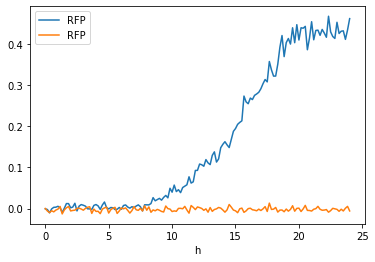

In [28]:
fig, ax = plt.subplots()
data.query('row == "B" and column == 2').plot(x='h', y='RFP', ax=ax)
data.query('row == "A" and column == 2').plot(x='h', y='RFP', ax=ax)


In [31]:
data.index = data.h
data.to_csv(path.replace('xlsx', 'csv'), index=None)

In [34]:
data1 = pd.read_csv("/home/aaristov/Multicell/Lena/Data/20210525_96wells_GrowthCurve/data.csv", index_col=0 )
data1

Reading  avg. time [s]         coord       RFP  label row  column  \
h                                                                              
0.000000         1           0.00  Blank1 (A01) -0.001602  Blank   A       1   
0.166900         2         600.84  Blank1 (A01) -0.006342  Blank   A       1   
0.333817         3        1201.74  Blank1 (A01) -0.006353  Blank   A       1   
0.500742         4        1802.67  Blank1 (A01)  0.000122  Blank   A       1   
0.667625         5        2403.45  Blank1 (A01) -0.005205  Blank   A       1   
...            ...            ...           ...       ...    ...  ..     ...   
47.402772      285      170649.98  Blank1 (H12) -0.009505  Blank   H      12   
47.569689      286      171250.88  Blank1 (H12) -0.005560  Blank   H      12   
47.736608      287      171851.79  Blank1 (H12) -0.006573  Blank   H      12   
47.903514      288      172452.65  Blank1 (H12) -0.006960  Blank   H      12   
48.070442      289      173053.59  Blank1 (H12) -0.010660  Blank   H      12   

           ng        h.1  
h                         
0.000000   -1   0.000000  
0.166900   -1   0.166900  
0.333817   -1   0.333817  
0.500742   -1   0.500742  
0.667625   -1   0.667625  
...        ..        ...  
47.402772  -1  47.402772  
47.569689  -1  47.569689  
47.736608  -1  47.736608  
47.903514  -1  47.903514  
48.070442  -1  48.070442  

[27744 rows x 9 columns]

In [40]:
data2 = pd.read_csv("/home/aaristov/Multicell/Lena/Data/20210518_96wells_GrowthCurve/data.csv", index_col=0 )
data2

Reading  avg. time [s]         coord       RFP  label row  column  \
h                                                                              
0.000000         1           0.00  Blank1 (A01) -0.006357  Blank   A       1   
0.166864         2         600.71  Blank1 (A01) -0.007141  Blank   A       1   
0.333794         3        1201.66  Blank1 (A01) -0.001082  Blank   A       1   
0.500681         4        1802.45  Blank1 (A01)  0.001959  Blank   A       1   
0.667606         5        2403.38  Blank1 (A01) -0.002730  Blank   A       1   
...            ...            ...           ...       ...    ...  ..     ...   
47.402842      285      170650.23  Blank1 (H12)  0.003108  Blank   H      12   
47.569772      286      171251.18  Blank1 (H12) -0.000473  Blank   H      12   
47.736669      287      171852.01  Blank1 (H12)  0.002570  Blank   H      12   
47.903606      288      172452.98  Blank1 (H12) -0.003280  Blank   H      12   
48.070506      289      173053.82  Blank1 (H12)  0.004471  Blank   H      12   

           ng        h.1  
h                         
0.000000   -1   0.000000  
0.166864   -1   0.166864  
0.333794   -1   0.333794  
0.500681   -1   0.500681  
0.667606   -1   0.667606  
...        ..        ...  
47.402842  -1  47.402842  
47.569772  -1  47.569772  
47.736669  -1  47.736669  
47.903606  -1  47.903606  
48.070506  -1  48.070506  

[27744 rows x 9 columns]

In [115]:
chip20dec = pd.read_csv("/home/aaristov/Anchor/Lena/Data/20211220-MIC/timelapse/intensities.csv")
chip20dec

time  label  mean_intensity     bg_mean         I     h
0         0      1      402.533702  402.485294  0.048408   0.0
1         0      2      402.855800  402.617194  0.238607   0.0
2         0      3      403.315493  403.000000  0.315493   0.0
3         0      4      402.916445  402.705835  0.210611   0.0
4         0      5      402.934587  402.904020  0.030567   0.0
...     ...    ...             ...         ...       ...   ...
10516    20    497      405.644217  405.013115  0.631102  10.0
10517    20    498      405.302182  405.214403  0.087779  10.0
10518    20    499      404.880340  404.850040  0.030300  10.0
10519    20    500      404.834343  404.647339  0.187004  10.0
10520    20    501      404.811216  404.775594  0.035622  10.0

[10521 rows x 6 columns]

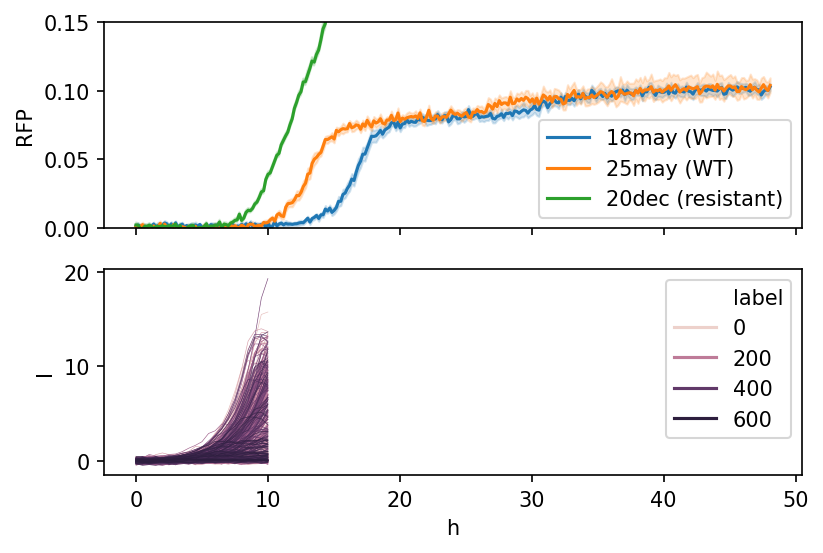

In [119]:
fig, ax = plt.subplots(nrows=2, dpi=150, sharex=True)
sns.lineplot(ax=ax[0], data=data2.query('ng == 0'), x='h.1', y='RFP', label='18may (WT)')
sns.lineplot(ax=ax[0], data=data1.query('ng == 0'), x='h.1', y='RFP', label='25may (WT)')
sns.lineplot(ax=ax[0], data=data.query('ng == 0'), x='h', y='RFP', label='20dec (resistant)')
ax[0].set_ylim(0, 0.15)
sns.lineplot(ax=ax[1], data=chip20dec, x='h', y='I', estimator=None, units='label', lw=.3, hue='label')

In [131]:
data

Reading  avg. time [s]         coord       RFP  label row  column  \
h                                                                              
0.000000         1           0.00  Blank1 (A01) -0.012930  Blank   A       1   
0.166644         2         599.92  Blank1 (A01) -0.004955  Blank   A       1   
0.333392         3        1200.21  Blank1 (A01) -0.007998  Blank   A       1   
0.500272         4        1800.98  Blank1 (A01) -0.009034  Blank   A       1   
0.666936         5        2400.97  Blank1 (A01)  0.003380  Blank   A       1   
...            ...            ...           ...       ...    ...  ..     ...   
23.348669      141       84055.21  Blank1 (H12) -0.011440  Blank   H      12   
23.515439      142       84655.58  Blank1 (H12)  0.015110  Blank   H      12   
23.682219      143       85255.99  Blank1 (H12) -0.003168  Blank   H      12   
23.849003      144       85856.41  Blank1 (H12) -0.003079  Blank   H      12   
24.015744      145       86456.68  Blank1 (H12) -0.007732  Blank   H      12   

           ng          h  
h                         
0.000000   -1   0.000000  
0.166644   -1   0.166644  
0.333392   -1   0.333392  
0.500272   -1   0.500272  
0.666936   -1   0.666936  
...        ..        ...  
23.348669  -1  23.348669  
23.515439  -1  23.515439  
23.682219  -1  23.682219  
23.849003  -1  23.849003  
24.015744  -1  24.015744  

[13920 rows x 9 columns]

In [136]:
data.loc[:,'label'] = data.row + data.column.astype(str).str.zfill(2)

In [139]:
data

Reading  avg. time [s]         coord       RFP label row  column  \
h                                                                             
0.000000         1           0.00  Blank1 (A01) -0.012930   A01   A       1   
0.166644         2         599.92  Blank1 (A01) -0.004955   A01   A       1   
0.333392         3        1200.21  Blank1 (A01) -0.007998   A01   A       1   
0.500272         4        1800.98  Blank1 (A01) -0.009034   A01   A       1   
0.666936         5        2400.97  Blank1 (A01)  0.003380   A01   A       1   
...            ...            ...           ...       ...   ...  ..     ...   
23.348669      141       84055.21  Blank1 (H12) -0.011440   H12   H      12   
23.515439      142       84655.58  Blank1 (H12)  0.015110   H12   H      12   
23.682219      143       85255.99  Blank1 (H12) -0.003168   H12   H      12   
23.849003      144       85856.41  Blank1 (H12) -0.003079   H12   H      12   
24.015744      145       86456.68  Blank1 (H12) -0.007732   H12   H      12   

           ng          h  
h                         
0.000000   -1   0.000000  
0.166644   -1   0.166644  
0.333392   -1   0.333392  
0.500272   -1   0.500272  
0.666936   -1   0.666936  
...        ..        ...  
23.348669  -1  23.348669  
23.515439  -1  23.515439  
23.682219  -1  23.682219  
23.849003  -1  23.849003  
24.015744  -1  24.015744  

[13920 rows x 9 columns]

ValueError: Unrecognized character I in format string

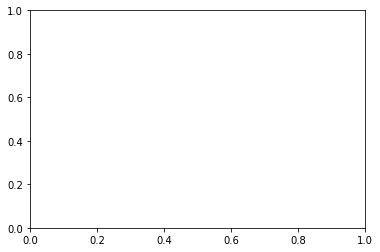

In [150]:
plt.plot('h','I', data=data)

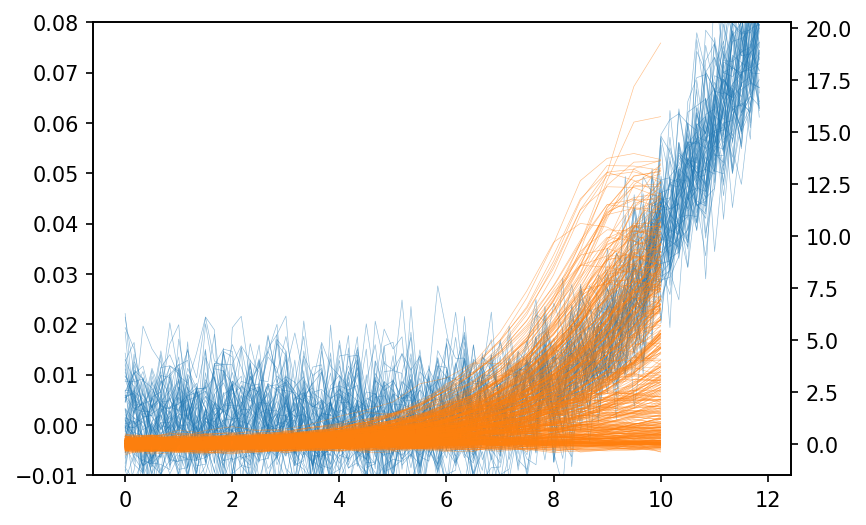

In [173]:
fig, ax = plt.subplots(dpi=150)
[ax.plot('h','RFP',data=data[data.label == l].query('h<=12'), color='tab:blue', alpha=.5, lw=.3) for l in data.query('ng == 0').label.unique()]
ax2 = ax.twinx()
[ax2.plot('h','I',data=chip20dec.query(f'label == {l}'), color='tab:orange', alpha=.5, lw=.3) for l in chip20dec.label.unique()]
ax.set_ylim(-0.01,.08)
plt.show()

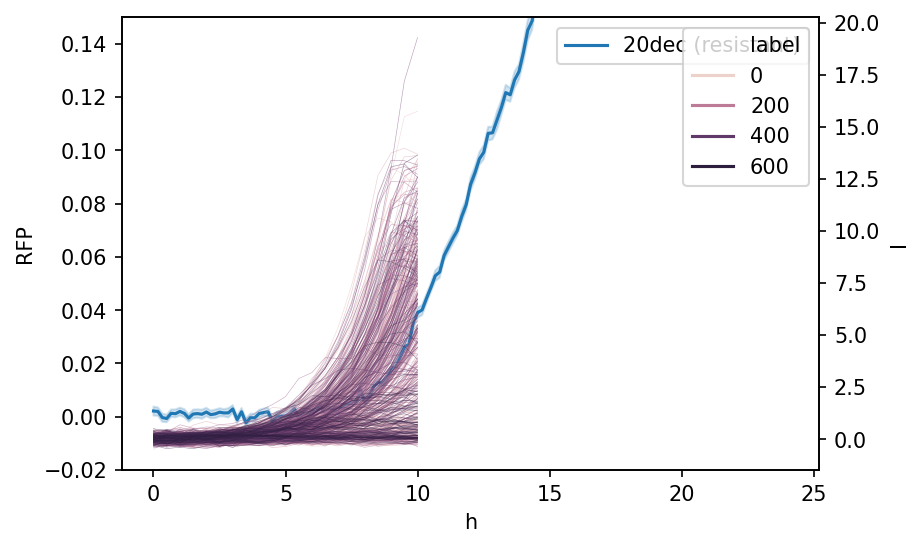

In [126]:
fig, ax = plt.subplots(nrows=1, dpi=150, sharex=True)
# sns.lineplot(ax=ax[0], data=data2.query('ng == 0'), x='h.1', y='RFP', label='18may (WT)')
# sns.lineplot(ax=ax[0], data=data1.query('ng == 0'), x='h.1', y='RFP', label='25may (WT)')
ax2=ax.twinx()
sns.lineplot(ax=ax, data=data.query('ng == 0'), x='h', y='RFP', label='20dec (resistant)')
ax.set_ylim(-.02, 0.15)
sns.lineplot(ax=ax2, data=chip20dec, x='h', y='I', estimator=None, units='label', lw=.3, hue='label', alpha=.5)

Text(0.5, 1.0, '0 ng: Doubling time = 0.9h, rate = 0.81 per h')

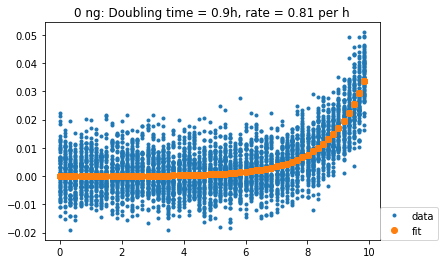

In [55]:
_, k = fit.fit_exponent((s := data.query('h<10 and ng == 0')).RFP, bins=s.h, plot='linear', markers=['.','o'])
plt.title(f'0 ng: Doubling time = {np.log(2)/k:.1f}h, rate = {k:0.2f} per h')

In [56]:
_, k = fit.fit_exponent((s := data.query('h<15 and ng == 0')).RFP, bins=s.h, plot='linear', markers=['.','o'])
plt.title(f'0 ng: Doubling time = {np.log(2)/k:.1f}h, rate = {k:0.2f} per h')

Text(0.5, 1.0, '0 ng: Doubling time = 2.0h, rate = 0.34 per h')

In [57]:
_, k = fit.fit_exponent((s := data.query('h<20 and ng == 0')).RFP, bins=s.h, plot='linear', markers=['.','o'])
plt.title(f'0 ng: Doubling time = {np.log(2)/k:.1f}h, rate = {k:0.2f} per h')

Text(0.5, 1.0, '0 ng: Doubling time = 3.3h, rate = 0.21 per h')

In [69]:
data.row.unique()

<StringArray>
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
Length: 8, dtype: string

Text(0.5, 1.0, '0 ng: Doubling time = 0.9h, rate = 0.80 per h')

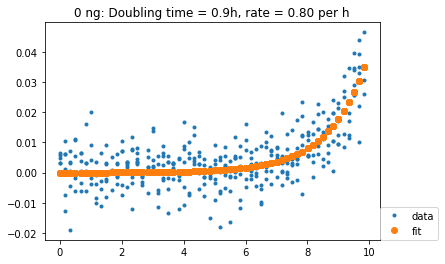

In [74]:
_, k = fit.fit_exponent((s := data.query('h<10 and ng == 0 and column == 5')).RFP, bins=s.h, plot='linear', markers=['.','o'])
plt.title(f'0 ng: Doubling time = {np.log(2)/k:.1f}h, rate = {k:0.2f} per h')

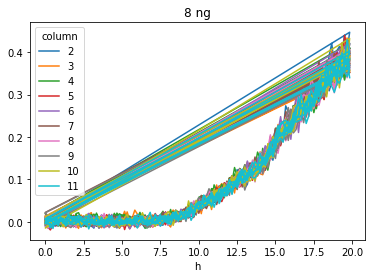

In [76]:
fig, ax = plt.subplots()
[data.query(f'20> h and ng == 0 and column=={c}').plot(ax=ax, x='h', y='RFP', label=c) for c in range(2,12)]
plt.legend(title='column')
plt.title(f'8 ng')
plt.show()

In [25]:
data.query('ng>-1').row.unique()

<StringArray>
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
Length: 8, dtype: string

In [109]:
# fig, ax = plt.subplots(ncols=2)
def fit_growth(data, row, col, rfp_lim=0.06, legend=False, plot='linear'):
    if col == 'all':
        dataset = data.query(f'row == "{row}"')
    else:
        dataset = data.query(f'row == "{row}" and column == {col}')
    ng = dataset.ng.values[0]
    try:
        timelim = min(dataset.query(f'RFP > {rfp_lim}').h)
        dataset = dataset.query(f'h < {timelim}')
    except ValueError:
        pass
    
    try:
        popt, pcov = fit.curve_fit(f=fit.exponent, xdata=dataset.h, ydata=dataset.RFP, p0=(1., 0.), bounds=(0, np.inf))
        fit_result = fit.exponent(dataset.h, *popt)
        pre, rate = popt
        rate_err = np.sqrt(np.diag(pcov))[1]
        fit.plot_fit(curve=dataset.RFP, fit=fit_result, vector=dataset.h, plot=plot, 
            labels=[f'data {row}{col}', 'fit'], markers=['.', '-'], legend=legend)
        return {
            'ng': ng, 
            'row': row,
            'column': col, 
            'pre': pre,
            'rate': rate,
            'rate_err': rate_err,
            'doubling time': np.log(2)/rate
        }  
    except RuntimeError:
        return {
        'ng': ng, 
        'row': row,
        'column': col, 
        'rate': 0,
        'rate_err': np.inf, 
        'doubling time': None
        } 
    except ValueError as e:
        repr(dataset)
        raise e

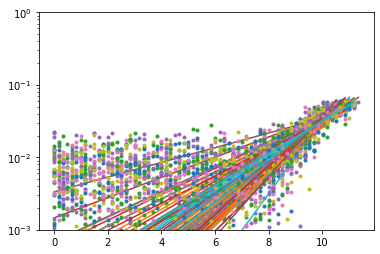

In [110]:
k = [fit_growth(data, row, col, legend=False, plot='log') for row in data.query('ng==0').row.unique() for col in range(2, 12) ]
# plt.title(f'Doubling time = {1/k:.1f}h, rate = {k:0.2f} per h')
plt.ylim(.001, 1)
plt.show()
# print(pd.DataFrame(k))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe855a86940>]],
      dtype=object)

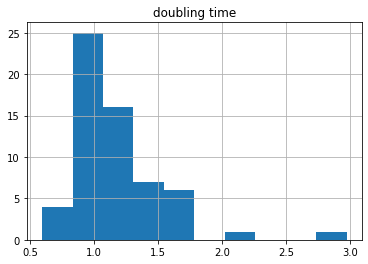

In [112]:
kf = pd.DataFrame(k)#
kf.hist('doubling time',)


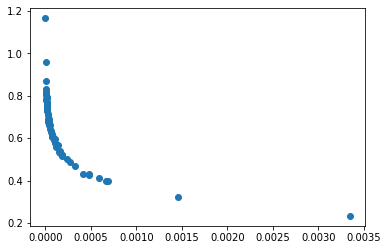

In [113]:
plt.scatter('pre', 'rate', data=kf)

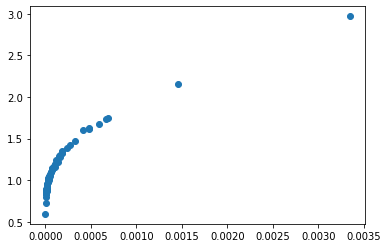

In [114]:
plt.scatter('pre', 'doubling time', data=kf)

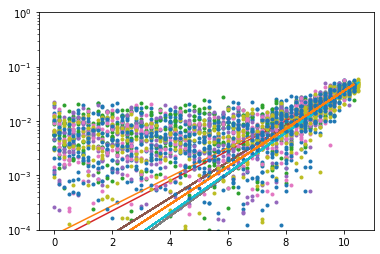

In [80]:
# fit per row
k = [fit_growth(data, row, 'all', legend=False, plot='log') for row in data.query('ng==0').row.unique() ]
# plt.title(f'Doubling time = {1/k:.1f}h, rate = {k:0.2f} per h')
plt.ylim(.0001, 1)
plt.show()
# print(pd.DataFrame(k))

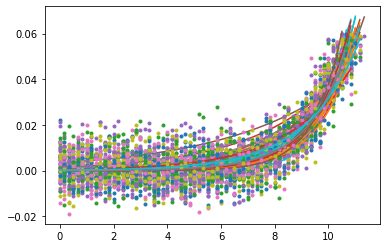

In [82]:
#fit per well
k1 = [fit_growth(data, row, c) for row in data.query('ng>-1').row.unique() for c in range(2, 12) ]
# plt.title(f'Doubling time = {1/k:.1f}h, rate = {k:0.2f} per h')
plt.show()
# print(pd.DataFrame(k1))

In [43]:
kf = pd.DataFrame(k)
kf.loc[:, 'date'] = '18 may plate'
kf1 = pd.DataFrame(k1)
kf1.loc[:, 'date'] = '25 may plate'

kk = pd.concat([kf, kf1], axis=0, ignore_index=True)
kk

ng row  column          rate      rate_err  doubling time          date
0     0   A       2  5.748148e-01  3.453906e-02   1.205862e+00  18 may plate
1     0   A       3  4.804507e-01  2.426865e-02   1.442702e+00  18 may plate
2     0   A       4  5.665835e-01  3.948906e-02   1.223381e+00  18 may plate
3     0   A       5  4.595753e-01  3.493101e-02   1.508234e+00  18 may plate
4     0   A       6  5.005312e-01  3.181588e-02   1.384823e+00  18 may plate
..   ..  ..     ...           ...           ...            ...           ...
125  32   H       7  6.602583e-22  4.311411e+04   1.049812e+21  25 may plate
126  32   H       8  7.326102e-20  1.694683e+03   9.461337e+18  25 may plate
127  32   H       9  1.319341e-20  1.036122e+04   5.253737e+19  25 may plate
128  32   H      10  9.509119e-20  1.171139e+03   7.289289e+18  25 may plate
129  32   H      11  1.796156e-22  1.497610e+06   3.859060e+21  25 may plate

[130 rows x 7 columns]

In [32]:
chip18_rates = pd.read_csv('/home/aaristov/Multicell/Lena/Data/20210518_control/growth_fits.csv', index_col=0)
chip18_rates.loc[:, 'ng'] = 0 
chip18_rates.loc[:, 'date'] = '18 may chip' 
# chip18_rates.columns = 
# chip18_rates

ccc = chip18_rates.loc[:, ['ng', 'label', 'c', 'date']]
ccc.columns = ['ng', 'column', 'rate', 'date']
ccc

ng  column      rate         date
0    0      87  0.535392  18 may chip
1    0      88  0.545203  18 may chip
2    0      89  0.546867  18 may chip
3    0      92  0.558133  18 may chip
4    0     103  0.499058  18 may chip
..  ..     ...       ...          ...
70   0     416  0.543638  18 may chip
71   0     420  0.489568  18 may chip
72   0     421  0.507603  18 may chip
73   0     428  0.415957  18 may chip
74   0     433  0.289288  18 may chip

[75 rows x 4 columns]

In [33]:
chip25_rates = pd.read_csv('/home/aaristov/Multicell/Lena/Data/20210525_control/growth_fits.csv', index_col=0)
chip25_rates.loc[:, 'ng'] = 0 
chip25_rates.loc[:, 'date'] = '25 may chip' 
# chip18_rates.columns = 
# chip18_rates

ccc25 = chip25_rates.loc[:, ['ng', 'label', 'c', 'date']]
ccc25.columns = ['ng', 'column', 'rate', 'date']
ccc25

ng  column      rate         date
0    0      89  0.522289  25 may chip
1    0      95  0.493573  25 may chip
2    0     103  0.557284  25 may chip
3    0     104  0.515693  25 may chip
4    0     115  0.500272  25 may chip
..  ..     ...       ...          ...
81   0     379  0.602369  25 may chip
82   0     380  0.602811  25 may chip
83   0     381  0.611413  25 may chip
84   0     382  0.625982  25 may chip
85   0     384  0.493614  25 may chip

[86 rows x 4 columns]

In [34]:
kkc = pd.concat((kk, ccc, ccc25))

In [35]:
kf1.to_csv('/home/aaristov/Multicell/Lena/Data/20210525_96wells_GrowthCurve/growth-rates.csv', index=None)
kf.to_csv('/home/aaristov/Multicell/Lena/Data/20210518_96wells_GrowthCurve/growth-rates.csv', index=None)


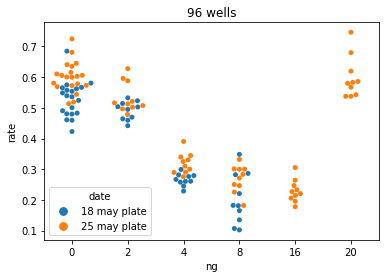

In [44]:
sns.swarmplot(data=kk.query('rate_err < 1'), x='ng', y='rate',  hue='date', size=5)
plt.title('96 wells')
plt.show()

In [45]:
def assign_rep(name):
    if '18' in name:
        return 'rep.1'
    else:
        return 'rep.2'

In [46]:
kkc.loc[:, 'container'] = kkc.date.apply(lambda a: a.split(' ')[-1])
kkc.loc[:, 'replicate'] = kkc.date.apply(assign_rep)

kkc

ng  row column      rate  rate_err  doubling time          date container  \
0   -1    A    all  0.521864  0.023776       1.328213  18 may plate     plate   
1   -1    B    all  0.553644  0.019881       1.251973  18 may plate     plate   
2   -1    C    all  0.488244  0.016704       1.419672  18 may plate     plate   
3   -1    D    all  0.267152  0.007267       2.594580  18 may plate     plate   
4   -1    E    all  0.122027  0.004631       5.680256  18 may plate     plate   
..  ..  ...    ...       ...       ...            ...           ...       ...   
81   0  NaN    379  0.602369       NaN            NaN   25 may chip      chip   
82   0  NaN    380  0.602811       NaN            NaN   25 may chip      chip   
83   0  NaN    381  0.611413       NaN            NaN   25 may chip      chip   
84   0  NaN    382  0.625982       NaN            NaN   25 may chip      chip   
85   0  NaN    384  0.493614       NaN            NaN   25 may chip      chip   

   replicate  
0      rep.1  
1      rep.1  
2      rep.1  
3      rep.1  
4      rep.1  
..       ...  
81     rep.2  
82     rep.2  
83     rep.2  
84     rep.2  
85     rep.2  

[246 rows x 9 columns]

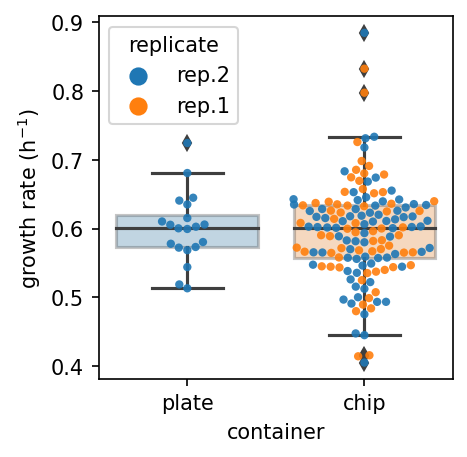

In [39]:
fig = plt.figure(dpi=150, figsize=(3,3))
sns.swarmplot(data=(d := kkc.query('ng == 0 and rate > .4')), x='container', y='rate',  hue='replicate', size=4, dodge=False, alpha=.9)
sns.boxplot(data=d, x='container', y='rate',  hue=None, dodge=True, boxprops={'alpha': .3}, orient=30)
# plt.title('96 wells vs chip growth rates')
plt.ylabel('growth rate (h$^{-1}$)')
fig.savefig('/home/aaristov/Multicell/Andrey/ELIFE_DRAFT/Figure1/growth_rates.pdf')
plt.tight_layout()
# plt.xlabel('replicate')
plt.show()

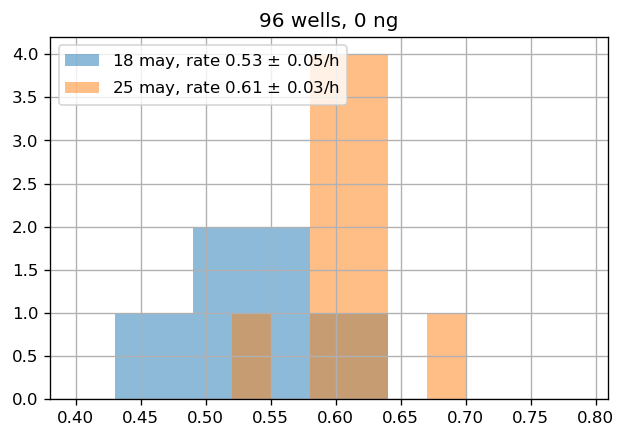

In [224]:
fig, ax = plt.subplots(dpi=120)
[(r := kk.query(f'ng==0 and date == "{d} may 2021"').rate).hist(alpha=.5, bins=np.arange(0.4, .8,.03), label=f'{d} may, rate {r.mean():.2f} $\pm$ {r.std():.2f}/h') for d in (18, 25)]#.mean(), r.std()
plt.legend()
plt.title('96 wells, 0 ng')
plt.show()

In [7]:
data.to_csv(path.replace('xlsx', 'csv'), index=None)

# plot manual counts

In [61]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 17.2 MB/s eta 0:00:01
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [14]:
mic_path = r'/home/aaristov/Multicell/Lena/Data/Analysis MIC/MIC.csv'
mic_path_count = r'/home/aaristov/Multicell/Lena/Data/Analysis MIC/mic_count_all.csv'

In [15]:
mic50 = pd.read_csv(mic_path_count)
mic50

Experiment  Inoculum_size  MIC  SD  Threshold
0            4     317.037037   11   1         50
1            4    1585.185185   15   1         50
2            4    3170.370370   26   6         50
3            4   15851.851852   26   6         50
4            4   31703.703704   26   6         50
5            4  317037.037037   26   6         50
6            5     292.592593   11   1         50
7            5    1462.962963   19   1         50
8            5    2925.925926   22   1         50
9            5   14629.629630   28   4         50
10           5   29259.259259   28   4         50
11           5  146296.296296   28   4         50
12           5  292592.592593   28   4         50
13           6     292.592593   11   1         50
14           6    1462.962963   19   1         50
15           6    2925.925926   22   1         50
16           6   14629.629630   28   4         50
17           6   29259.259259   28   4         50
18           6  146296.296296   28   4         50
19           6  292592.592593   28   4         50
20           4     317.037037    9   1        150
21           4    1585.185185   13   1        150
22           4    3170.370370   18   2        150
23           4   15851.851852   26   6        150
24           4  158518.518519   26   6        150
25           4  317037.037037   26   6        150
26           5     292.592593    9   1        150
27           5    1462.962963   13   1        150
28           5    2925.925926   19   1        150
29           5   14629.629630   22   2        150
30           5   29259.259259   28   4        150
31           5  146296.296296   28   4        150
32           5  292592.592593   28   4        150
33           6     292.592593    9   1        150
34           6    1462.962963   17   1        150
35           6    2925.925926   19   1        150
36           6   14629.629630   28   4        150
37           6   29259.259259   28   4        150
38           6  146296.296296   28   4        150
39           6  292592.592593   28   4        150
40           4     317.037037    7   1        250
41           4    1585.185185   11   1        250
42           4    3170.370370   13   1        250
43           4   15851.851852   15   1        250
44           4  158518.518519   13   1        250
45           4  317037.037037   18   2        250
46           5     292.592593    7   1        250
47           5    1462.962963   11   1        250
48           5    2925.925926   15   1        250
49           5   14629.629630   13   1        250
50           5   29259.259259   22   2        250
51           5  146296.296296   28   4        250
52           5  292592.592593   28   4        250
53           6     292.592593    7   1        250
54           6    1462.962963   13   1        250
55           6    2925.925926   15   1        250
56           6   14629.629630   22   2        250
57           6   29259.259259   28   4        250
58           6  146296.296296   28   4        250
59           6  292592.592593   28   4        250

In [16]:
mic = pd.read_csv(mic_path)
mic.index = mic.Inoculum_size
mic

Experiment  Inoculum_size   MIC   SD  MIC_by_density
Inoculum_size                                                      
210.370370              1     210.370370   5.5  0.5        0.026144
1051.851852             1    1051.851852   5.5  0.5        0.005229
2103.703704             1    2103.703704   7.5  0.5        0.003565
10518.518519            1   10518.518519   9.5  0.5        0.000903
21037.037037            1   21037.037037  11.0  1.0        0.000523
105185.185185           1  105185.185185  14.0  2.0        0.000133
210370.370370           1  210370.370370  14.0  2.0        0.000067
265.185185              2     265.185185   3.0  1.0        0.011313
1325.925926             2    1325.925926   5.0  1.0        0.003771
2651.851852             2    2651.851852   5.0  1.0        0.001885
13259.259259            2   13259.259259   9.0  1.0        0.000679
26518.518519            2   26518.518519  11.0  1.0        0.000415
132592.592593           2  132592.592593  17.0  1.0        0.000128
265185.185185           2  265185.185185  17.0  1.0        0.000064
288.148148              3     288.148148   3.0  1.0        0.010411
1440.740741             3    1440.740741   5.0  1.0        0.003470
2881.481481             3    2881.481481   5.0  1.0        0.001735
14407.407407            3   14407.407407  11.0  1.0        0.000763
28814.814815            3   28814.814815  13.0  1.0        0.000451
144074.074074           3  144074.074074  19.0  1.0        0.000132
288148.148148           3  288148.148148  19.0  1.0        0.000066
317.037037              4     317.037037   5.0  1.0        0.015771
1585.185185             4    1585.185185   5.0  1.0        0.003154
3170.370370             4    3170.370370  11.0  1.0        0.003470
15851.851852            4   15851.851852  13.0  1.0        0.000820
31703.703704            4   31703.703704  15.0  1.0        0.000473
158518.518519           4  158518.518519  13.0  1.0        0.000082
317037.037037           4  317037.037037  15.0  1.0        0.000047
292.592593              5     292.592593   5.0  1.0        0.017089
1462.962963             5    1462.962963   5.0  1.0        0.003418
2925.925926             5    2925.925926   7.0  1.0        0.002392
14629.629630            5   14629.629630  11.0  1.0        0.000752
29259.259259            5   29259.259259  13.0  1.0        0.000444
146296.296296           5  146296.296296  19.0  1.0        0.000130
292592.592593           5  292592.592593  22.0  2.0        0.000075
292.592593              6     292.592593   5.0  1.0        0.017089
1462.962963             6    1462.962963   5.0  1.0        0.003418
2925.925926             6    2925.925926   7.0  1.0        0.002392
14629.629630            6   14629.629630   9.0  1.0        0.000615
29259.259259            6   29259.259259  13.0  1.0        0.000444
146296.296296           6  146296.296296  19.0  1.0        0.000130
292592.592593           6  292592.592593  22.0  2.0        0.000075

In [17]:
chip_mic = pd.DataFrame(data={'replicate': range(1,6), 'lambda': [.7, 1.3, 5.4, 4.1, 1.3], 'MIC': [10, 12, 15, 15, 12]})
chip_mic.loc[:,'Inoculum_size'] = chip_mic['lambda'] * 501
chip_mic

replicate  lambda  MIC  Inoculum_size
0          1     0.7   10          350.7
1          2     1.3   12          651.3
2          3     5.4   15         2705.4
3          4     4.1   15         2054.1
4          5     1.3   12          651.3

1
2
3
4
5
6
50
150
250


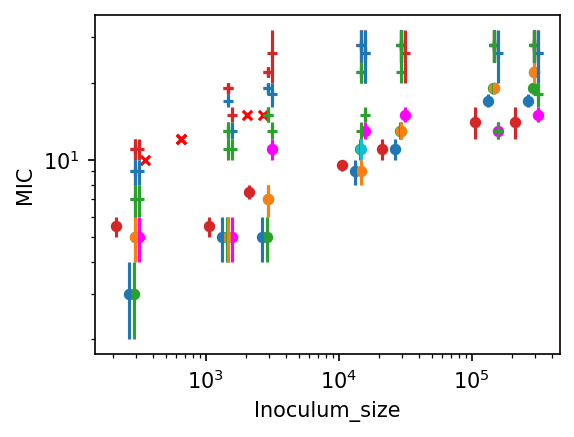

In [24]:
fig, ax = plt.subplots(figsize=(4,3), dpi=150)
colors=('tab:red', 'tab:blue', 'tab:green', 'magenta','tab:cyan', 'tab:orange')
for c,exp in zip(colors,mic.Experiment.unique()):
    print (exp)
    mic.query(f'Experiment == {exp}').plot(ax=ax, x='Inoculum_size', y='MIC', yerr='SD', kind='scatter', loglog=True, color=c)
chip_mic.plot(ax=ax, x='Inoculum_size', y='MIC', kind='scatter', marker='x', color='red')

for c,thr in zip(colors,mic50.Threshold.unique()):
    print (thr)
    mic50.query(f'Threshold == {thr}').plot(ax=ax, x='Inoculum_size', y='MIC', yerr='SD', kind='scatter', loglog=True, color=c, marker='+',)


In [25]:
fig, ax = plt.subplots(figsize=(4,3), dpi=150)
colors=('tab:red', 'tab:blue', 'tab:green', 'magenta','tab:cyan', 'tab:orange')
for c,exp in zip(colors,mic.Experiment.unique()):
    print (exp)
    mic.query(f'Experiment == {exp}').plot(ax=ax, x='Inoculum_size', y='MIC', yerr='SD', kind='scatter', loglog=True, color=c)
chip_mic.plot(ax=ax, x='Inoculum_size', y='MIC', kind='scatter', marker='x', color='red')

# for c,thr in zip(colors,mic50.Threshold.unique()):
#     print (thr)
#     mic50.query(f'Threshold == {thr}').plot(ax=ax, x='Inoculum_size', y='MIC', yerr='SD', kind='scatter', loglog=True, color=c, marker='+',)


1
2
3
4
5
6


50
150
250


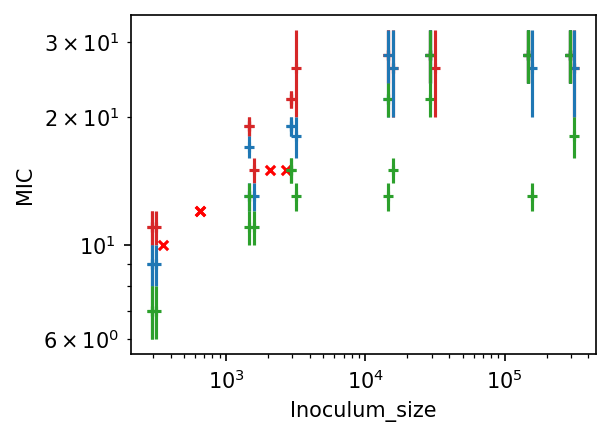

In [28]:
fig, ax = plt.subplots(figsize=(4,3), dpi=150)
colors=('tab:red', 'tab:blue', 'tab:green', 'magenta','tab:cyan', 'tab:orange')
# for c,exp in zip(colors,mic.Experiment.unique()):
#     print (exp)
#     mic.query(f'Experiment == {exp}').plot(ax=ax, x='Inoculum_size', y='MIC', yerr='SD', kind='scatter', loglog=True, color=c)
chip_mic.plot(ax=ax, x='Inoculum_size', y='MIC', kind='scatter', marker='x', color='red', )

for c,thr in zip(colors,mic50.Threshold.unique()):
    print (thr)
    mic50.query(f'Threshold == {thr}').plot(ax=ax, x='Inoculum_size', y='MIC', yerr='SD', kind='scatter', loglog=True, color=c, marker='+',)


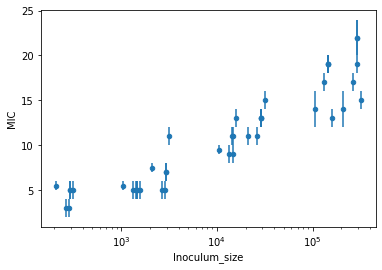

In [17]:
mic.plot(x='Inoculum_size', y='MIC', yerr='SD', kind='scatter', logy=False, logx=True)

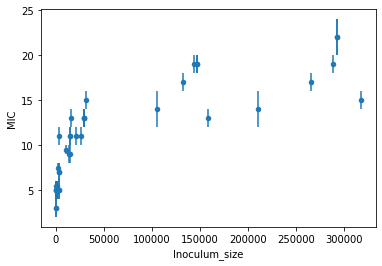

In [18]:
mic.plot(x='Inoculum_size', y='MIC', yerr='SD', kind='scatter', logy=False, logx=False)